In [1]:
import sys
import json
import pprint

import numpy as np
from datasets import load_dataset
from IPython.display import display

sys.path.append("../")
from src import Params

In [2]:
config_path = "../configs/train_config.json"

In [3]:
config = Params(config_path)

In [4]:
dataset_dict = load_dataset(config.DATA.DATASET_NAME)

# Data Distribution

In [5]:
print(f"Total number of training examples: {len(dataset_dict['train'])}")
print(f"Total number of validation examples: {len(dataset_dict['validation'])}")
print(f"Total number of test examples: {len(dataset_dict['test'])}")

Total number of training examples: 800
Total number of validation examples: 100
Total number of test examples: 100


# Look at Samples

In [6]:
dash_line = "-".join(" " for _ in range(100))

In [7]:
def resize_image_aspect_ratio(image, target_size):
    width, height = image.size
    aspect_ratio = width / height

    if width < height:
        new_width = target_size
        new_height = round(new_width / aspect_ratio)
    else:
        new_height = target_size
        new_width = round(new_height * aspect_ratio)

    resized_image = image.resize((new_width, new_height))

    return resized_image

In [8]:
def visualize_data(sample):
    image = sample["image"]
    image = resize_image_aspect_ratio(image, 400)
    ground_truth = json.loads(sample["ground_truth"])
    gt_parsed = ground_truth["gt_parse"]
    
    print(dash_line)
    print("IMAGE:\n")
    display(image)
    print(dash_line)
    print("PARSE:\n")
    pprint.pprint(gt_parsed)
    print(dash_line)

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Example 1


 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
IMAGE:



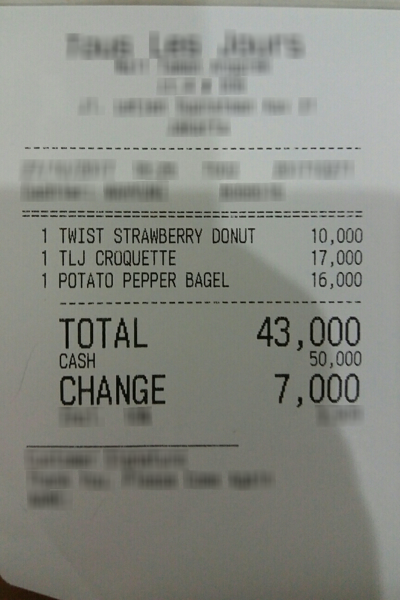

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PARSE:

{'menu': [{'cnt': '1', 'nm': 'TWIST STRAWBERRY DONUT', 'price': '10,000'},
          {'cnt': '1', 'nm': 'TLJ CROQUETTE', 'price': '17,000'},
          {'cnt': '1', 'nm': 'POTATO PEPPER BAGEL', 'price': '16,000'}],
 'total': {'cashprice': '50,000',
           'changeprice': '7,000',
           'total_price': '43,000'}}
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Example 2
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

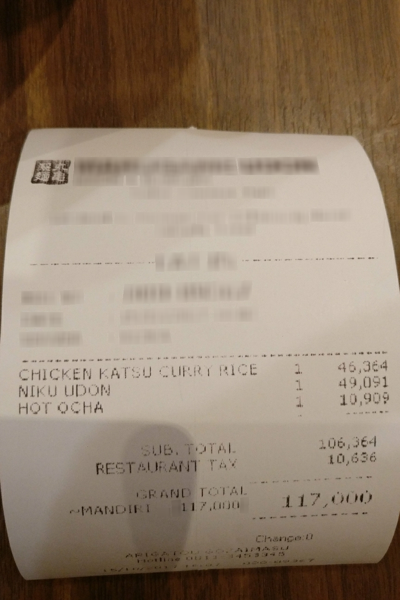

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PARSE:

{'menu': [{'cnt': '1', 'nm': 'CHICKEN KATSU CURRY RICE', 'price': '46,364'},
          {'cnt': '1', 'nm': 'NIKU UDON', 'price': '49,091'},
          {'cnt': '1', 'nm': 'HOT OCHA', 'price': '10,909'}],
 'sub_total': {'subtotal_price': '106,364', 'tax_price': '10,636'},
 'total': {'changeprice': '0',
           'creditcardprice': '117,000',
           'total_price': '117,000'}}
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Example 3
 - 

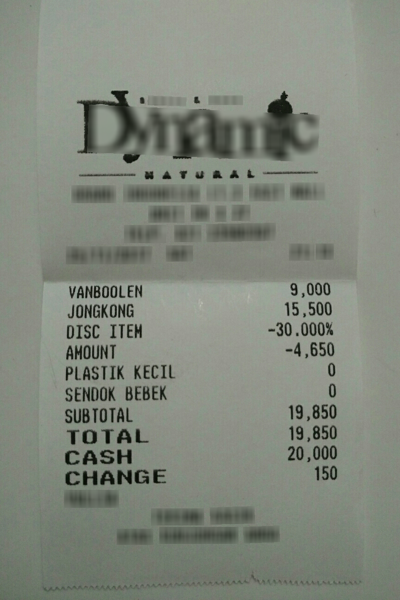

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PARSE:

{'menu': [{'nm': 'VANBOOLEN', 'price': '9,000'},
          {'discountprice': '-4,650', 'nm': 'JONGKONG', 'price': '15,500'},
          {'nm': 'PLASTIK KECIL', 'price': '0'},
          {'nm': 'SENDOK BEBEK', 'price': '0'}],
 'sub_total': {'subtotal_price': '19,850'},
 'total': {'cashprice': '20,000',
           'changeprice': '150',
           'total_price': '19,850'}}
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Example 4
 - - - - - 

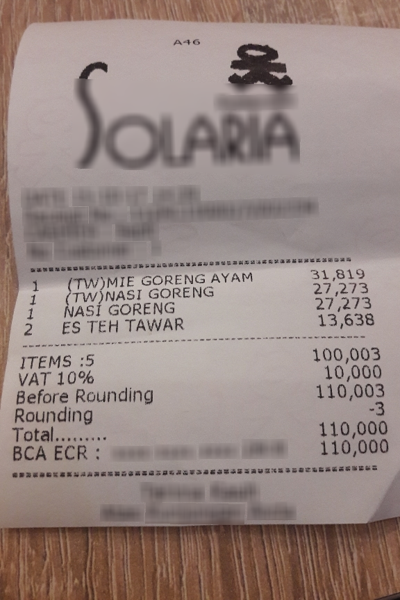

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PARSE:

{'menu': [{'cnt': '1', 'nm': '(TW) MIE GORENG AYAM', 'price': '31,819'},
          {'cnt': '1', 'nm': '(TW)NASI GORENG', 'price': '27,273'},
          {'cnt': '1', 'nm': 'NASI GORENG', 'price': '27,273'},
          {'cnt': '2', 'nm': 'ES TEH TAWAR', 'price': '13,638'}],
 'sub_total': {'etc': '110,003 -3',
               'subtotal_price': '100,003',
               'tax_price': '10,000'},
 'total': {'creditcardprice': '110,000',
           'menuqty_cnt': '5',
           'total_price': '110,000'}}
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

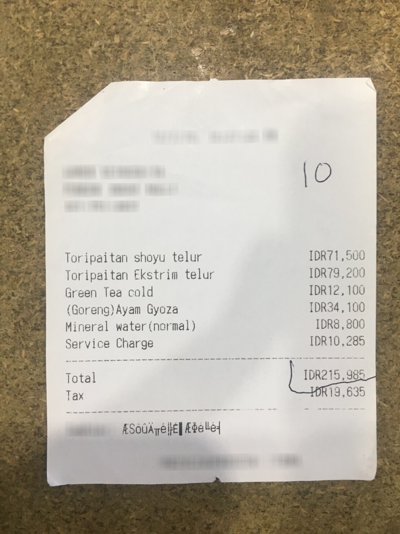

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PARSE:

{'menu': [{'nm': 'Toripaitan shoyu telur', 'price': '71,500'},
          {'nm': 'Toripaitan Ekstrim telur', 'price': '79,200'},
          {'nm': 'Green Tea cold', 'price': '12,100'},
          {'nm': '(Goreng)Ayam Gyoza', 'price': '34,100'},
          {'nm': 'Mineral water(normal)', 'price': '8,800'}],
 'sub_total': {'service_price': '10,285', 'tax_price': '19,635'},
 'total': {'total_price': '215,985'}}
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


In [9]:
train_dataset = dataset_dict["train"]

example_indices = np.random.randint(0, len(train_dataset), 5)

for i, index in enumerate(example_indices):
    print(dash_line)
    print("Example", i+1)
    visualize_data(train_dataset[int(index)])